In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv("data/integrated/integrated_data_fillna.csv")
df.head()

,Country,location_code,country_code,Type,Year,total_population,male_population,female_population,population_density,life_expectancy_at_birth,...,gdp_growth,gdp_per_capita,inflation_change,total_safe_water_service,total_safe_sanitation_service,health_expenditure_over_gdp,health_expenditure_per_capita,Region,Subregion,Status
0,Afghanistan,4,AFG,Country/Area,2000,19542.982,9815.442,9727.541,30.099,55.298,...,0.0,223.456175,5.1,20.97,20.97,9.44,17.01,ASIA,Southern Asia,Developing
1,Afghanistan,4,AFG,Country/Area,2001,19688.632,9895.467,9793.166,30.323,55.798,...,0.0,221.803120,5.1,20.98,20.98,9.44,17.01,ASIA,Southern Asia,Developing
2,Afghanistan,4,AFG,Country/Area,2002,21000.256,10562.202,10438.055,32.343,56.454,...,0.0,233.433000,5.1,22.54,22.54,9.44,17.01,ASIA,Southern Asia,Developing
3,Afghanistan,4,AFG,Country/Area,2003,22645.130,11397.483,11247.647,34.876,57.344,...,8.7,233.755000,35.7,24.10,24.10,8.94,17.81,ASIA,Southern Asia,Developing
4,Afghanistan,4,AFG,Country/Area,2004,23553.551,11862.726,11690.825,36.276,57.944,...,0.7,254.259000,16.4,25.67,25.67,9.81,21.43,ASIA,Southern Asia,Developing


In [12]:
df_for_correlation = df.drop(columns=['Country', 'location_code', 'country_code', 'Type', 'male_population', 'female_population',
                                      'male_life_expectancy_at_birth', 'female_life_expectancy_at_birth'])
df_for_correlation

,Year,total_population,population_density,life_expectancy_at_birth,infant_deaths_per_1000,mortality_between_15_60_per_1000,gdp,gdp_growth,gdp_per_capita,inflation_change,total_safe_water_service,total_safe_sanitation_service,health_expenditure_over_gdp,health_expenditure_per_capita,Region,Subregion,Status
0,2000,19542.982,30.099,55.298,90.813,322.256,4.367,0.0,0.000223,5.1,20.97,20.97,9.44,17.01,ASIA,Southern Asia,Developing
1,2001,19688.632,30.323,55.798,88.358,316.523,4.367,0.0,0.000222,5.1,20.98,20.98,9.44,17.01,ASIA,Southern Asia,Developing
2,2002,21000.256,32.343,56.454,85.779,306.104,4.367,0.0,233.433000,5.1,22.54,22.54,9.44,17.01,ASIA,Southern Asia,Developing
3,2003,22645.130,34.876,57.344,82.600,295.454,4.553,8.7,233.755000,35.7,24.10,24.10,8.94,17.81,ASIA,Southern Asia,Developing
4,2004,23553.551,36.276,57.944,79.936,288.209,5.146,0.7,254.259000,16.4,25.67,25.67,9.81,21.43,ASIA,Southern Asia,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,2017,14751.101,38.131,60.709,38.724,356.567,21.385,5.2,1481.241000,0.9,36.94,36.94,6.36,92.25,AFRICA,Eastern Africa,Developing
4066,2018,15052.184,38.910,61.414,37.354,344.144,37.035,5.0,2529.401000,10.6,36.36,36.36,4.67,114.60,AFRICA,Eastern Africa,Developing
4067,2019,15354.608,39.691,61.292,37.195,347.489,26.045,-6.3,1747.346000,255.3,35.77,35.77,3.23,54.81,AFRICA,Eastern Africa,Developing
4068,2020,15669.666,40.506,61.124,36.810,349.046,26.905,-7.8,1771.290000,557.2,35.19,35.19,2.95,50.68,AFRICA,Eastern Africa,Developing


<ipython-input-13-9b03a334643c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df_for_correlation.corr(method="spearman")


Text(0.5, 1.0, 'Correlation matrix among numerical variables')

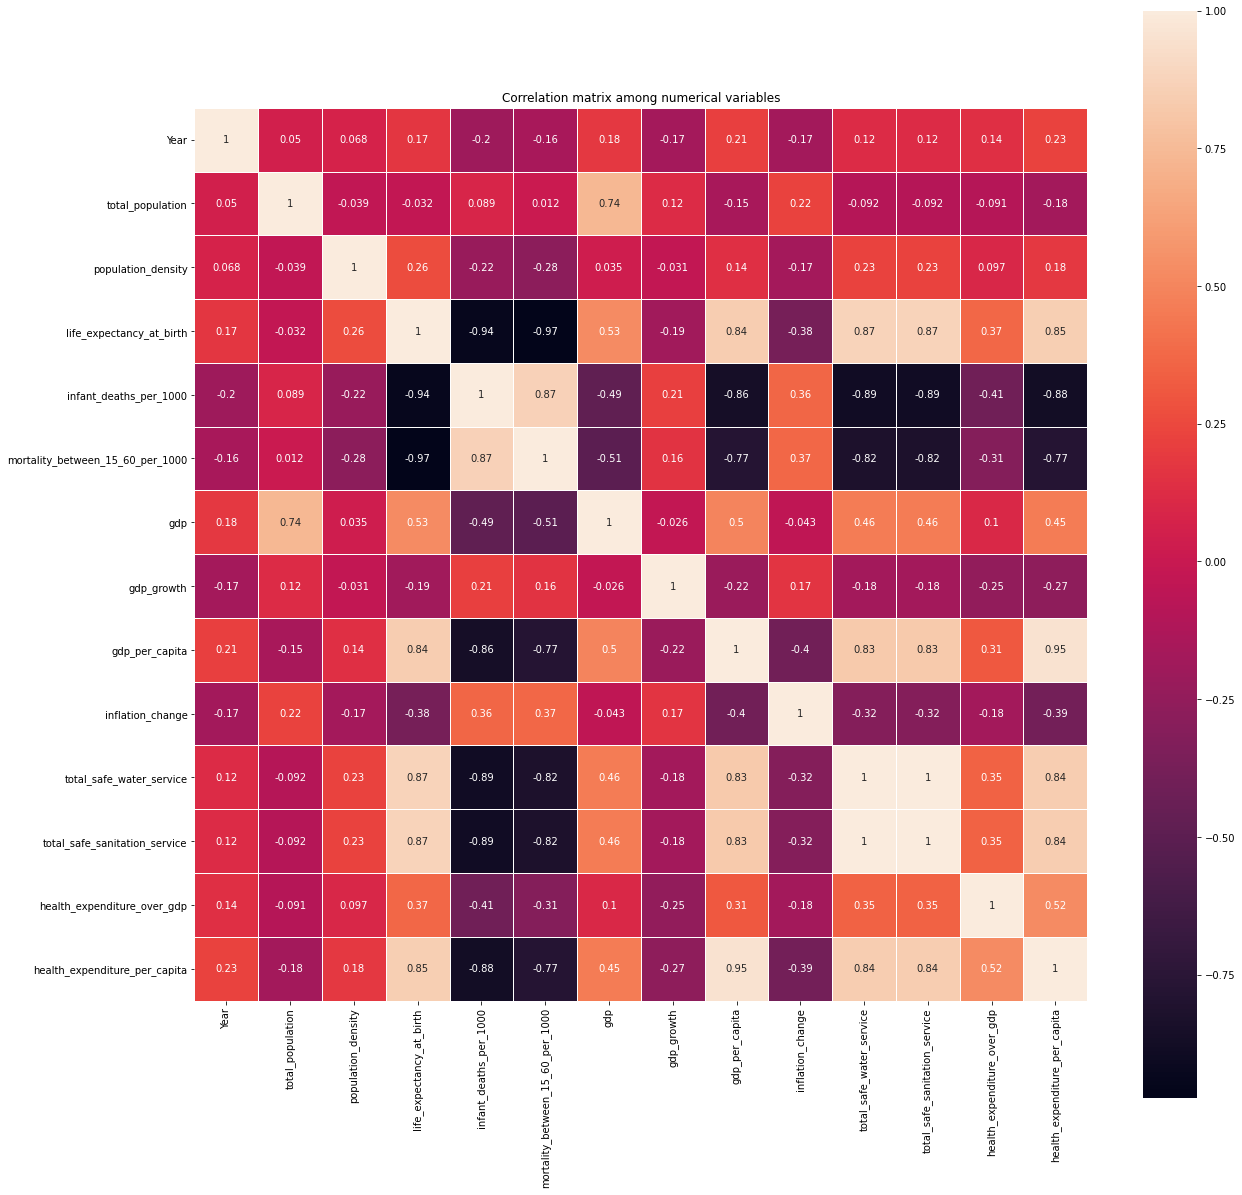

In [13]:
corr_mat = df_for_correlation.corr(method="spearman")
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat, square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among numerical variables")

In [95]:
df_for_model = df.drop(columns=['location_code', 'country_code', 'Type', 'male_population', 'female_population',
                                'male_life_expectancy_at_birth', 'female_life_expectancy_at_birth'])
df_for_model.head()

,Country,Year,total_population,population_density,life_expectancy_at_birth,infant_deaths_per_1000,mortality_between_15_60_per_1000,gdp,gdp_growth,gdp_per_capita,inflation_change,total_safe_water_service,total_safe_sanitation_service,health_expenditure_over_gdp,health_expenditure_per_capita,Region,Subregion,Status
0,Afghanistan,2000,19542.982,30.099,55.298,90.813,322.256,4.367,0.0,223.456175,5.1,20.97,20.97,9.44,17.01,ASIA,Southern Asia,Developing
1,Afghanistan,2001,19688.632,30.323,55.798,88.358,316.523,4.367,0.0,221.803120,5.1,20.98,20.98,9.44,17.01,ASIA,Southern Asia,Developing
2,Afghanistan,2002,21000.256,32.343,56.454,85.779,306.104,4.367,0.0,233.433000,5.1,22.54,22.54,9.44,17.01,ASIA,Southern Asia,Developing
3,Afghanistan,2003,22645.130,34.876,57.344,82.600,295.454,4.553,8.7,233.755000,35.7,24.10,24.10,8.94,17.81,ASIA,Southern Asia,Developing
4,Afghanistan,2004,23553.551,36.276,57.944,79.936,288.209,5.146,0.7,254.259000,16.4,25.67,25.67,9.81,21.43,ASIA,Southern Asia,Developing


In [96]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
scaler = StandardScaler()

numerical_columns = df_for_model.select_dtypes(exclude=['object']).columns.tolist()
numerical_columns.remove("Year")
numerical_columns.remove("life_expectancy_at_birth")
for column in numerical_columns:
    df_for_model[column] = scaler.fit_transform(df_for_model[column].values.reshape(-1, 1))

categorical_columns = df_for_model.select_dtypes(include=['object']).columns.tolist()
for column in categorical_columns:
    df_for_model[f'{column}_encoded'] = label_encoder.fit_transform(df_for_model[column])
    df_for_model.drop(columns=[column], inplace=True)

df_for_model

,Year,total_population,population_density,life_expectancy_at_birth,infant_deaths_per_1000,mortality_between_15_60_per_1000,gdp,gdp_growth,gdp_per_capita,inflation_change,total_safe_water_service,total_safe_sanitation_service,health_expenditure_over_gdp,health_expenditure_per_capita,Country_encoded,Region_encoded,Subregion_encoded,Status_encoded
0,2000,-0.129056,-0.264490,55.298,2.467187,1.250010,-0.232637,-0.436584,-0.660304,-0.021930,-1.696055,-1.696055,1.105590,-0.549669,0,1,16,1
1,2001,-0.128009,-0.264106,55.798,2.371514,1.197192,-0.232637,-0.436584,-0.660397,-0.021930,-1.695721,-1.695721,1.105590,-0.549669,0,1,16,1
2,2002,-0.118588,-0.260640,56.454,2.271010,1.101202,-0.232637,-0.436584,-0.659743,-0.021930,-1.643714,-1.643714,1.105590,-0.549669,0,1,16,1
3,2003,-0.106772,-0.256295,57.344,2.147123,1.003083,-0.232511,0.706793,-0.659725,0.006616,-1.591707,-1.591707,0.933291,-0.549167,0,1,16,1
4,2004,-0.100247,-0.253893,57.944,2.043306,0.936335,-0.232108,-0.344588,-0.658572,-0.011388,-1.539367,-1.539367,1.233092,-0.546895,0,1,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,2017,-0.163476,-0.250711,60.709,0.437258,1.566118,-0.221081,0.246813,-0.589595,-0.025848,-1.163649,-1.163649,0.044223,-0.502450,184,0,4,1
4066,2018,-0.161314,-0.249375,61.414,0.383869,1.451665,-0.210453,0.220529,-0.530671,-0.016799,-1.182984,-1.182984,-0.538150,-0.488423,184,0,4,1
4067,2019,-0.159141,-0.248035,61.292,0.377673,1.482482,-0.217916,-1.264547,-0.574636,0.211475,-1.202654,-1.202654,-1.034374,-0.525946,184,0,4,1
4068,2020,-0.156878,-0.246637,61.124,0.362669,1.496827,-0.217332,-1.461681,-0.573290,0.493110,-1.221990,-1.221990,-1.130862,-0.528538,184,0,4,1


In [109]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

# train test split
X, y = df_for_model.drop(columns=['life_expectancy_at_birth']), df_for_model['life_expectancy_at_birth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3256, 17), (3256,), (814, 17), (814,))

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [112]:
y_pred = linear_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(1.2629621232771377, 0.9834299518806212)

In [113]:
from xgboost import XGBRFRegressor
model = XGBRFRegressor(n_estimators=200, reg_alpha=1e-4)

model.fit(X_train, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=200, n_jobs=0, num_parallel_tree=200,
               objective='reg:squarederror', predictor='auto', random_state=0,
               reg_alpha=0.0001, sampling_method='uniform', scale_pos_weight=1, ...)

In [114]:
y_predict = model.predict(X_test)

In [115]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(1.2629621232771377, 0.9834299518806212)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

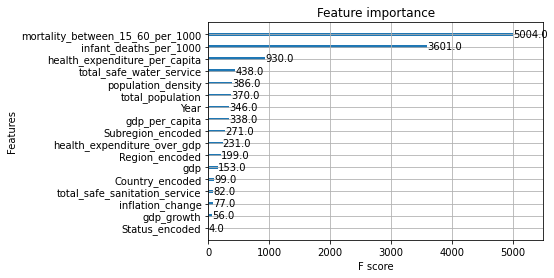

In [116]:
from xgboost import plot_importance
plot_importance(model)

In [117]:
df

,Country,location_code,country_code,Type,Year,total_population,male_population,female_population,population_density,life_expectancy_at_birth,...,gdp_growth,gdp_per_capita,inflation_change,total_safe_water_service,total_safe_sanitation_service,health_expenditure_over_gdp,health_expenditure_per_capita,Region,Subregion,Status
0,Afghanistan,4,AFG,Country/Area,2000,19542.982,9815.442,9727.541,30.099,55.298,...,0.0,223.456175,5.1,20.97,20.97,9.44,17.01,ASIA,Southern Asia,Developing
1,Afghanistan,4,AFG,Country/Area,2001,19688.632,9895.467,9793.166,30.323,55.798,...,0.0,221.803120,5.1,20.98,20.98,9.44,17.01,ASIA,Southern Asia,Developing
2,Afghanistan,4,AFG,Country/Area,2002,21000.256,10562.202,10438.055,32.343,56.454,...,0.0,233.433000,5.1,22.54,22.54,9.44,17.01,ASIA,Southern Asia,Developing
3,Afghanistan,4,AFG,Country/Area,2003,22645.130,11397.483,11247.647,34.876,57.344,...,8.7,233.755000,35.7,24.10,24.10,8.94,17.81,ASIA,Southern Asia,Developing
4,Afghanistan,4,AFG,Country/Area,2004,23553.551,11862.726,11690.825,36.276,57.944,...,0.7,254.259000,16.4,25.67,25.67,9.81,21.43,ASIA,Southern Asia,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,Zimbabwe,716,ZWE,Country/Area,2017,14751.101,6940.631,7810.471,38.131,60.709,...,5.2,1481.241000,0.9,36.94,36.94,6.36,92.25,AFRICA,Eastern Africa,Developing
4066,Zimbabwe,716,ZWE,Country/Area,2018,15052.184,7086.002,7966.181,38.910,61.414,...,5.0,2529.401000,10.6,36.36,36.36,4.67,114.60,AFRICA,Eastern Africa,Developing
4067,Zimbabwe,716,ZWE,Country/Area,2019,15354.608,7231.989,8122.618,39.691,61.292,...,-6.3,1747.346000,255.3,35.77,35.77,3.23,54.81,AFRICA,Eastern Africa,Developing
4068,Zimbabwe,716,ZWE,Country/Area,2020,15669.666,7385.220,8284.447,40.506,61.124,...,-7.8,1771.290000,557.2,35.19,35.19,2.95,50.68,AFRICA,Eastern Africa,Developing


In [122]:
df['health_expenditure_over_gdp'].describe()

count    4070.000000
mean        6.231667
std         2.902274
min         1.110000
25%         4.135000
50%         5.595000
75%         7.970000
max        24.280000
Name: health_expenditure_over_gdp, dtype: float64